In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("conversion_project.csv")
df.head(5)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [18]:
# There are no nulls in this dataset. country and source are categorical
# variables. new_user and converted are binary varibles (1 or 0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [4]:
# There seems to be some bad data from age (123). Should explore to see
# how many rows have bad data

df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [28]:
# There are 6 rows with users ages 70+. The two rows with ages above 100
# seems to be errors. I will remove them from the dataset.

df[df['age']>70]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
154217,US,73,1,Seo,5,0
192644,US,77,0,Direct,4,0
208969,US,72,1,Direct,4,0
265167,US,79,1,Direct,1,0
295581,UK,111,0,Ads,10,1


In [31]:
df = df[df['age']<100]

In [32]:
# 80% of the users are from US and China 

country = pd.Categorical(df['country'])
country.describe()

,counts,freqs
categories,,
China,76602,0.242260
Germany,13055,0.041287
UK,48449,0.153224
US,178092,0.563229


In [33]:
# 50% of the users arrive to the site by clicking on search results

source = pd.Categorical(df['source'])
source.describe()

,counts,freqs
categories,,
Ads,88739,0.280644
Direct,72420,0.229034
Seo,155039,0.490323


array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='new_user', ylabel='age'>,
        <AxesSubplot:xlabel='total_pages_visited', ylabel='age'>,
        <AxesSubplot:xlabel='converted', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='new_user'>,
        <AxesSubplot:xlabel='new_user', ylabel='new_user'>,
        <AxesSubplot:xlabel='total_pages_visited', ylabel='new_user'>,
        <AxesSubplot:xlabel='converted', ylabel='new_user'>],
       [<AxesSubplot:xlabel='age', ylabel='total_pages_visited'>,
        <AxesSubplot:xlabel='new_user', ylabel='total_pages_visited'>,
        <AxesSubplot:xlabel='total_pages_visited', ylabel='total_pages_visited'>,
        <AxesSubplot:xlabel='converted', ylabel='total_pages_visited'>],
       [<AxesSubplot:xlabel='age', ylabel='converted'>,
        <AxesSubplot:xlabel='new_user', ylabel='converted'>,
        <AxesSubplot:xlabel='total_pages_visited', ylabel='converted'>,
        <AxesSubplot:xlabel='converted', yl

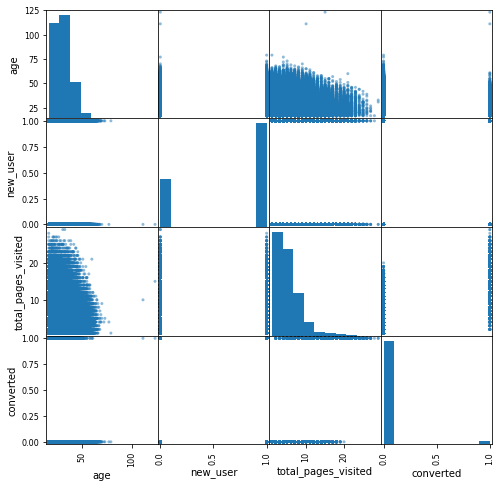

In [13]:
# Model most likely needs to be a classification model to predict whether
# a user will convert or not

pd.plotting.scatter_matrix(df, figsize=(8,8))

In [14]:
df.corr()

,age,new_user,total_pages_visited,converted
age,1.000000,0.012343,-0.045922,-0.088797
new_user,0.012343,1.000000,-0.082541,-0.152374
total_pages_visited,-0.045922,-0.082541,1.000000,0.528994
converted,-0.088797,-0.152374,0.528994,1.000000
